<a href="https://colab.research.google.com/github/effortprogrammer/Nh_Bank_Data_Visualization/blob/main/NHtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm

import warnings

warnings.filterwarnings(action='ignore')

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [4]:
iem_info = '/content/drive/MyDrive/리그2/2_iem_info.csv'
act_info = '/content/drive/MyDrive/리그2/2_act_info.csv'
cus_info = '/content/drive/MyDrive/리그2/2_cus_info.csv'
trd_kr = '/content/drive/MyDrive/리그2/2_trd_kr.csv'
trd_oss = '/content/drive/MyDrive/리그2/2_trd_oss.csv'
data_xlsx = '/content/drive/MyDrive/리그2/data_schema_vf.xlsx'
renamecus = '/content/drive/MyDrive/리그2/rename_cus.csv'
sanup = '/content/drive/MyDrive/리그2/sangjang.csv'


In [6]:
act = pd.read_csv(act_info)
cus = pd.read_csv(cus_info)
trdk = pd.read_csv(trd_kr)
trdo = pd.read_csv(trd_oss)
data = pd.read_excel(data_xlsx)
iem = pd.read_csv(iem_info)
sanup = pd.read_csv(sanup)

고객 정보와 id 그리고 종목 정보를 활용하기 위하여 테이블들을 merge 하였습니다.


In [7]:
iem_trd = pd.merge(trdk,iem, on = 'iem_cd', how = 'left')
iem_trd_act = pd.merge(iem_trd, act, on = 'act_id', how = 'left')
iem_trd_act_cus = pd.merge(iem_trd_act, cus, on = 'cus_id', how = 'left')
iem_trd.head()

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,iem_eng_nm,iem_krl_nm
0,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,1,12,13,A215600,2,35.0,74200.0,3,"SillaJen, Inc. ...",신라젠 ...
1,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,2,12,12,A001060,2,20.0,41100.0,3,JWPHARMACEUTICAL ...,JW중외제약보통주 ...
2,effb34815e1b7efb34beb550f604ede8ac71a5a71edb30...,20190102,1,14,14,A281820,2,20.0,9460.0,4,KCTECH ...,케이씨텍보통주 ...
3,fea6c038cb7236a02d1e779262698a36219b4c9b527ab1...,20190102,1,12,12,A006650,2,1.0,148500.0,3,KOREA PETRO CHEMICAL IND ...,대한유화보통주 ...
4,fea6c038cb7236a02d1e779262698a36219b4c9b527ab1...,20190102,2,12,13,A051360,2,10.0,6550.0,3,"TOVIS Co., LTD ...",토비스 ...


Y and Z 세대 테이블

In [8]:
#20~30대
iem_trd_act_cus_yz = iem_trd_act_cus[(iem_trd_act_cus['cus_age']==20) | (iem_trd_act_cus['cus_age']==25)| (iem_trd_act_cus['cus_age']==30)| (iem_trd_act_cus['cus_age']==35)]
iem_trd_act_cus_yz.reset_index(drop = True, inplace = True)

Y and Z세대가 아닌 테이블

In [9]:
#20대 제외
iem_trd_act_cus_notyz = iem_trd_act_cus[(iem_trd_act_cus['cus_age'] >= 40)]
iem_trd_act_cus_notyz.reset_index(drop = True, inplace = True)

yz대의 주문매체 비율 그래프

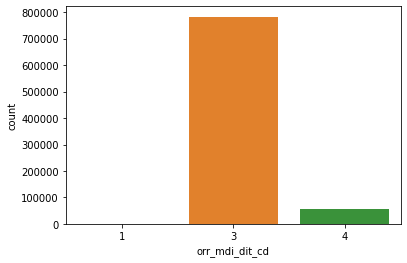

In [10]:
sns.countplot(iem_trd_act_cus_yz['orr_mdi_dit_cd'].sort_values())

40대 이상의 주문매체 비율 그래프

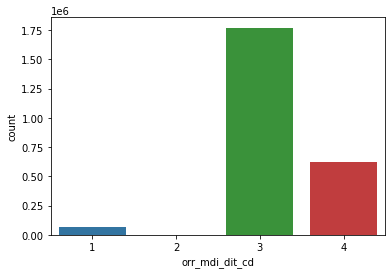

In [11]:
sns.countplot(iem_trd_act_cus_notyz['orr_mdi_dit_cd'].sort_values())

20대와 30대의 주문매체 비율 수치

In [12]:
yz_jumun1 = iem_trd_act_cus_yz['orr_mdi_dit_cd'].value_counts().sort_index()[1]
# yz_jumun2 = iem_trd_act_cus_yz['orr_mdi_dit_cd'].value_counts().sort_index()[2]
yz_jumun3 = iem_trd_act_cus_yz['orr_mdi_dit_cd'].value_counts().sort_index()[3]
yz_jumun4 = iem_trd_act_cus_yz['orr_mdi_dit_cd'].value_counts().sort_index()[4]

notyz_jumun1 = iem_trd_act_cus_notyz['orr_mdi_dit_cd'].value_counts().sort_index()[1]
notyz_jumun2 = iem_trd_act_cus_notyz['orr_mdi_dit_cd'].value_counts().sort_index()[2]
notyz_jumun3 = iem_trd_act_cus_notyz['orr_mdi_dit_cd'].value_counts().sort_index()[3]
notyz_jumun4 = iem_trd_act_cus_notyz['orr_mdi_dit_cd'].value_counts().sort_index()[4]


whole20 = iem_trd_act_cus_yz['orr_mdi_dit_cd'].value_counts().sum()
wholenot20 = iem_trd_act_cus_notyz['orr_mdi_dit_cd'].value_counts().sum()


print('yz세대의 영업점 단말',round(yz_jumun1/whole20*100,2) )
print('yz세대의 유선 단말: 0')
print('yz세대의 무선단말MTS(모바일)',round(yz_jumun3/whole20*100,2) )
print('yz세대의 HTS(컴퓨터)',round(yz_jumun4/whole20*100,2) )

print('\n')

print('yz세대가 아닌사람의 영업점 단말',round(notyz_jumun1/wholenot20*100,2) )
print('yz세대가 아닌사람의 유선 단말',round(notyz_jumun2/wholenot20*100,2) )
print('yz세대가 아닌사람의 무선단말MTS(모바일)',round(notyz_jumun3/wholenot20*100,2) )
print('yz세대가 아닌사람의 HTS(컴퓨터)',round(notyz_jumun4/wholenot20*100,2) )


yz세대의 영업점 단말 0.09
yz세대의 유선 단말: 0
yz세대의 무선단말MTS(모바일) 93.31
yz세대의 HTS(컴퓨터) 6.6


yz세대가 아닌사람의 영업점 단말 2.75
yz세대가 아닌사람의 유선 단말 0.11
yz세대가 아닌사람의 무선단말MTS(모바일) 71.78
yz세대가 아닌사람의 HTS(컴퓨터) 25.36


# Y and Z 세대와 그렇지 않은 사람들의 9시 주문매체 사용 비중 보기




In [13]:
#YZ세대의 9시 거래 데이터만 남기기

iem_trd_act_cus_yz_9si = iem_trd_act_cus_yz[iem_trd_act_cus_yz['orr_rtn_hur']==9]

#40대 이상의 9시 거래 데이터만 남기기
iem_trd_act_cus_notyz_9si = iem_trd_act_cus_notyz[iem_trd_act_cus_notyz['orr_rtn_hur']==9]

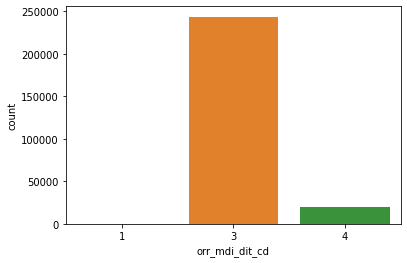

In [14]:
#yz세대의 9시 주문매체 그래프
sns.countplot(iem_trd_act_cus_yz_9si['orr_mdi_dit_cd'].sort_values())

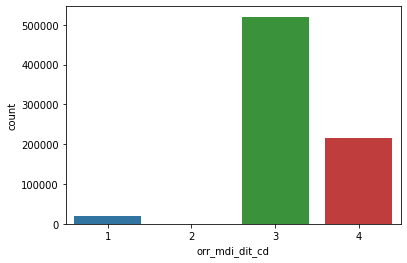

In [15]:
#40대 이상의 9시 주문매체 그래프
sns.countplot(iem_trd_act_cus_notyz_9si['orr_mdi_dit_cd'].sort_values())

In [16]:
jumun1 = iem_trd_act_cus_yz_9si['orr_mdi_dit_cd'].value_counts().sort_index()[1]
#jumun2 = iem_trd_act_cus_yz_9si['orr_mdi_dit_cd'].value_counts().sort_index()[2]
jumun3 = iem_trd_act_cus_yz_9si['orr_mdi_dit_cd'].value_counts().sort_index()[3]
jumun4 = iem_trd_act_cus_yz_9si['orr_mdi_dit_cd'].value_counts().sort_index()[4]

notjumun1 = iem_trd_act_cus_notyz_9si['orr_mdi_dit_cd'].value_counts().sort_index()[1]
notjumun2 = iem_trd_act_cus_notyz_9si['orr_mdi_dit_cd'].value_counts().sort_index()[2]
notjumun3 = iem_trd_act_cus_notyz_9si['orr_mdi_dit_cd'].value_counts().sort_index()[3]
notjumun4 = iem_trd_act_cus_notyz_9si['orr_mdi_dit_cd'].value_counts().sort_index()[4]


wholeyz = iem_trd_act_cus_yz_9si['orr_mdi_dit_cd'].value_counts().sum()
wholenotyz = iem_trd_act_cus_notyz_9si['orr_mdi_dit_cd'].value_counts().sum()


print('yz세대의 9시 영업점 단말',round(jumun1/wholeyz*100,2) )
print('yz세대의 9시 유선 단말: 0')
print('yz세대의 9시 무선단말MTS(모바일)',round(jumun3/wholeyz*100,2) )
print('yz세대의 9시 HTS(컴퓨터)',round(jumun4/wholeyz*100,2) )

print('\n')

print('yz세대아닌사람의 9시 영업점 단말',round(notjumun1/wholenotyz*100,2) )
print('yz세대아닌사람의 9시 유선 단말',round(notjumun2/wholenotyz*100,2) )
print('yz세대아닌사람의 9시 무선단말MTS(모바일)',round(notjumun3/wholenotyz*100,2) )
print('yz세대아닌사람의 9시 HTS(컴퓨터)',round(notjumun4/wholenotyz*100,2) )


yz세대의 9시 영업점 단말 0.05
yz세대의 9시 유선 단말: 0
yz세대의 9시 무선단말MTS(모바일) 92.48
yz세대의 9시 HTS(컴퓨터) 7.47


yz세대아닌사람의 9시 영업점 단말 2.67
yz세대아닌사람의 9시 유선 단말 0.1
yz세대아닌사람의 9시 무선단말MTS(모바일) 68.69
yz세대아닌사람의 9시 HTS(컴퓨터) 28.53


In [17]:
'''
yz세대의 9시 영업점 단말 0.05
yz세대의 9시 유선 단말: 0
yz세대의 9시 무선단말MTS(모바일) 92.48
yz세대의 9시 HTS(컴퓨터) 7.47


yz세대아닌사람의 9시 영업점 단말 2.67
yz세대아닌사람의 9시 유선 단말 0.1
yz세대아닌사람의 9시 무선단말MTS(모바일) 68.69
yz세대아닌사람의 9시 HTS(컴퓨터) 28.53


yz세대의 영업점 단말 0.09
yz세대의 유선 단말: 0
yz세대의 무선단말MTS(모바일) 93.31
yz세대의 HTS(컴퓨터) 6.6


yz세대가 아닌사람의 영업점 단말 2.75
yz세대가 아닌사람의 유선 단말 0.11
yz세대가 아닌사람의 무선단말MTS(모바일) 71.78
yz세대가 아닌사람의 HTS(컴퓨터) 25.36

결론 : 비중변화는 크게 없음
'''

'\nyz세대의 9시 영업점 단말 0.05\nyz세대의 9시 유선 단말: 0\nyz세대의 9시 무선단말MTS(모바일) 92.48\nyz세대의 9시 HTS(컴퓨터) 7.47\n\n\nyz세대아닌사람의 9시 영업점 단말 2.67\nyz세대아닌사람의 9시 유선 단말 0.1\nyz세대아닌사람의 9시 무선단말MTS(모바일) 68.69\nyz세대아닌사람의 9시 HTS(컴퓨터) 28.53\n\n\nyz세대의 영업점 단말 0.09\nyz세대의 유선 단말: 0\nyz세대의 무선단말MTS(모바일) 93.31\nyz세대의 HTS(컴퓨터) 6.6\n\n\nyz세대가 아닌사람의 영업점 단말 2.75\nyz세대가 아닌사람의 유선 단말 0.11\nyz세대가 아닌사람의 무선단말MTS(모바일) 71.78\nyz세대가 아닌사람의 HTS(컴퓨터) 25.36\n\n결론 : 비중변화는 크게 없음\n'

# 계좌 개설이 가장 많은 달 뽑기

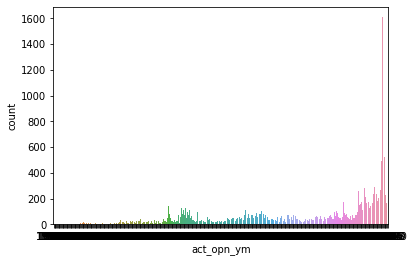

In [18]:
sns.countplot(act['act_opn_ym'].sort_values())

In [19]:
actall = act['act_opn_ym'].value_counts().sort_index()
print(actall)

0            2
197603       1
197611       1
197805       1
197909       2
197912       1
198210       2
198409       2
198501       1
198510       2
198604       2
198606       2
198610       1
198612       2
198701       1
198702       4
198703       3
198706       1
198707       5
198708       7
198709       6
198710       2
198711       6
198712       3
198801       6
198802       3
198803       1
198804       5
198805       2
198806      21
198807      10
198808       5
198809       2
198810      14
198811      15
198812      14
198901       7
198902      20
198903      14
198904      16
198905      12
198906       7
198907       4
198908       9
198909       7
198910       3
198911       7
198912       5
199001       3
199002       1
199003       3
199004       3
199005       9
199006       5
199007       5
199008       5
199009       2
199010       2
199011       6
199012       3
199101       9
199102       7
199103       4
199104       1
199105       3
199106       3
199107    

In [20]:
#기간이 너무 길다. 2018년 이전 제외

act_2018 = act[(act['act_opn_ym'] > 201800)]
act_2018.reset_index(drop = True, inplace = True)


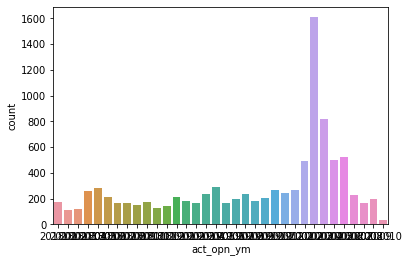

In [21]:
sns.countplot(act_2018['act_opn_ym'].sort_values())

In [22]:
act2018 = act_2018['act_opn_ym'].value_counts().sort_index()
print(act2018)

201801     171
201802     113
201803     118
201804     258
201805     282
201806     212
201807     168
201808     168
201809     151
201810     176
201811     128
201812     145
201901     210
201902     181
201903     168
201904     235
201905     293
201906     164
201907     196
201908     233
201909     182
201910     204
201911     268
201912     243
202001     269
202002     490
202003    1608
202004     817
202005     498
202006     523
202007     231
202008     168
202009     195
202010      36
Name: act_opn_ym, dtype: int64


2020년, 즉 올해 2월에 갑자기 계좌개설 급증, 3월에 평균의 열배이상 증가

그럼 이때 들어온 사람들의 연령대를 알아보자

In [23]:
#고객정보와 계좌 정보를 merge한다

cus_act = pd.merge(cus, act, on = 'cus_id', how = 'left')

In [24]:
#여기서 2020년03월에 개설한 계좌의 정보만 출력
cus_act_03 = cus_act[cus_act['act_opn_ym']==202003]

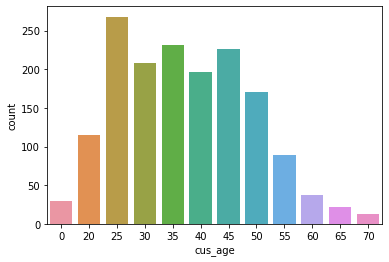

In [25]:
#2020년03월에 개설한 계좌 주인들의 연령 분포 시각화
sns.countplot(cus_act_03['cus_age'].sort_values())

In [26]:
#수치화
print(cus_act_03['cus_age'].value_counts().sort_index())


0      30
20    115
25    268
30    208
35    232
40    197
45    226
50    171
55     89
60     37
65     22
70     13
Name: cus_age, dtype: int64


In [27]:
#뉴비들의 사용 매체
cus_act_03_trd = pd.merge(cus_act_03,trdk, on = 'act_id', how = 'left')
print(cus_act_03_trd['orr_mdi_dit_cd'].value_counts().sort_index())

1.0       325
2.0        65
3.0    196203
4.0      8180
Name: orr_mdi_dit_cd, dtype: int64


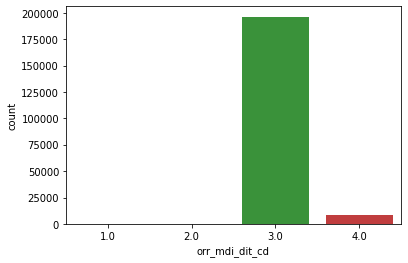

In [28]:
#뉴비들 사용매체 그래프
sns.countplot(cus_act_03_trd['orr_mdi_dit_cd'].sort_values())

20대가 스스로 생각하는 투자성향

In [29]:
'''
2030 = 823
나머지 = 1,376
2030 비중 37.4퍼
'''

'\n2030 = 823\n나머지 = 1,376\n2030 비중 37.4퍼\n'

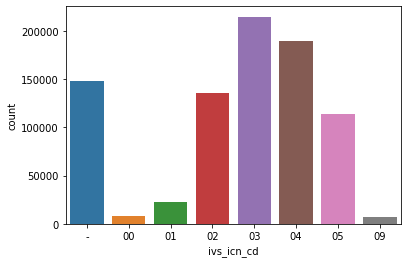

In [30]:
sns.countplot(iem_trd_act_cus_yz['ivs_icn_cd'].sort_values())

30대가 스스로 생각하는 투자성향

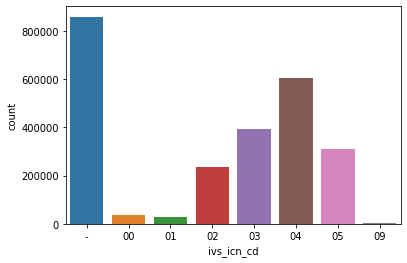

In [31]:
sns.countplot(iem_trd_act_cus_notyz['ivs_icn_cd'].sort_values())

산업군 비율 분석

In [32]:
#뉴비들이 뭘 자주 샀는지 확인
# iem krl nm
# cus_act_03_trd.head()

# a = [cus_act_03_trd['iem_cd']]
cus_act_03_trd_top_r = cus_act_03_trd['iem_cd'].value_counts()
a = [cus_act_03_trd_top_r]
a.sort()

# print(cus_act_03_trd_top)
a
# iem_sanup.head()

[A005930         7466
 A252670         3855
 A096530         2516
 A005380         2482
 A000660         2386
                 ... 
 A046120            1
 A013570            1
 A007690            1
 A005810            1
 A000725            1
 Name: iem_cd, Length: 2075, dtype: int64]

In [33]:


iem_trd = pd.merge(trdk,iem, on = 'iem_cd', how = 'left')
cus_act_03_trd_iem = pd.merge(cus_act_03_trd, iem, on = 'iem_cd', how='left')
cus_act_03_trd_iem_top_r = cus_act_03_trd_iem['iem_krl_nm'].value_counts()
a= [cus_act_03_trd_iem_top_r]
a.sort()
a

[삼성전자보통주                                                         7466
 삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형)                           3855
 씨젠                                                              2516
 현대자동차보통주                                                        2482
 에스케이하이닉스보통주                                                     2386
                                                                 ... 
 신한금융투자 신한 옥수수 선물 파생결합증권(상장지수증권)(H)                                 1
 큐로홀딩스                                                              1
 이건산업보통주                                                            1
 젬백스지오                                                              1
 리드                                                                 1
 Name: iem_krl_nm, Length: 2074, dtype: int64]

In [43]:
iem_trd_act_cus_notyz = iem_trd_act_cus[(iem_trd_act_cus['cus_age'] >= 40)] # A005930 = 삼성전자보통주
# iem_trd_act_cus_notyz.reset_index(drop = True, inplace = True)
#03월에 계좌 개설한 사람들의 계좌정보 = cus_act_03
#계좌 + 트레이드 + iem
cus_act_03_trd_iem = pd.merge(cus_act_03, iem_trd, on = 'act_id', how = 'left')

cus_act_03_trd_iem_sam = cus_act_03_trd_iem_non[(cus_act_03_trd_iem_non['top10']==1)]
cus_act_03_trd_iem_sam.reset_index(inplace=True)
cus_act_03_trd_iem_sam.reset_index(drop=True,inplace=True )
cus_act_03_trd_iem_sam.head()

# 코드 정리 절실히 필요

NameError: ignored

In [40]:
top10 = ['삼성전자보통주']

cus_act_03_trd_iem_non['top10'] = 0
for i,company in tqdm(enumerate(cus_act_03_trd_iem_non['iem_krl_nm'])):
    if company.strip() in top10:
        cus_act_03_trd_iem_non.iloc[i,-1] = 1
        

NameError: ignored

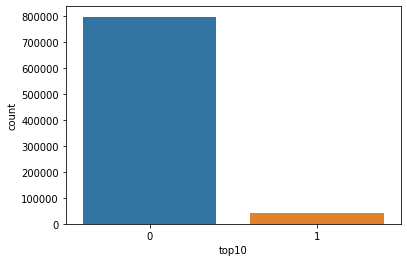

In [ ]:
sns.countplot(iem_trd_act_cus_yz['top10'])

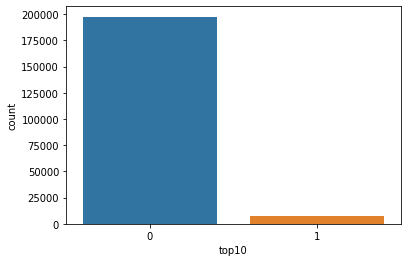

In [ ]:
sns.countplot(cus_act_03_trd_iem_non['top10'])

In [ ]:
cus_act_03_trd_iem_non = cus_act_03_trd_iem.fillna("없음")

In [ ]:
cus_act_03_trd_iem_non.head(30)

In [ ]:
#뉴비들의 삼전거래 많은 날 순서

cus_act_03_trd_iem_sam = cus_act_03_trd_iem_non['orr_dt'].value_counts()
a= [cus_act_03_trd_iem_sam]
a.sort()
a

[20200611.0    4224
 20200421.0    3832
 20200528.0    3806
 20200615.0    3793
 20200603.0    3694
 20200604.0    3596
 20200612.0    3523
 20200522.0    3521
 20200420.0    3513
 20200527.0    3508
 20200609.0    3485
 20200623.0    3362
 20200407.0    3304
 20200619.0    3294
 20200519.0    3293
 20200526.0    3284
 20200617.0    3265
 20200417.0    3259
 20200608.0    3225
 20200625.0    3223
 20200410.0    3217
 20200605.0    3130
 20200622.0    3107
 20200521.0    3105
 20200602.0    3092
 20200610.0    3071
 20200504.0    3052
 20200624.0    3044
 20200406.0    3038
 20200616.0    3038
 20200408.0    3026
 20200514.0    3011
 20200413.0    3004
 20200511.0    2959
 20200515.0    2955
 20200512.0    2950
 20200428.0    2917
 20200618.0    2874
 20200518.0    2852
 20200626.0    2840
 20200401.0    2828
 20200423.0    2815
 20200424.0    2804
 20200403.0    2786
 20200429.0    2767
 20200416.0    2764
 20200525.0    2760
 20200529.0    2760
 20200520.0    2757
 20200422.0    2748


In [ ]:
cus_act_03_trd_iem_sam = cus_act_03_trd_iem[(cus_act_03_trd_iem['iem_cd']=='a005930')]
cus_act_03_trd_iem_sam.reset_index(inplace=True)
# cus_act_03_trd_iem_sam.reset_index(drop=True,inplace=True )
cus_act_03_trd_iem_sam.head()

20대와 30대의 리스크 선호형 비율

In [ ]:
risk_like = iem_trd_act_cus_20['ivs_icn_cd'].value_counts().sort_index()[5] + iem_trd_act_cus_20['ivs_icn_cd'].value_counts().sort_index()[6]
whole = iem_trd_act_cus_20['ivs_icn_cd'].value_counts().sum()

risk_like_up = iem_trd_act_cus_not20['ivs_icn_cd'].value_counts().sort_index()[5] + iem_trd_act_cus_not20['ivs_icn_cd'].value_counts().sort_index()[6]
whole_up = iem_trd_act_cus_not20['ivs_icn_cd'].value_counts().sum()

print('20대의 리스크 선호형 비율: ',risk_like/whole*100 )
print('30대 이상의 리스크 선호형 비율: ',risk_like_up/whole_up*100 )

20대의 리스크 선호형 비율:  23.95244441008055
30대 이상의 리스크 선호형 비율:  37.66308511341585


20대의 리스크 선호 집단의 비율이 30대에 비해 13퍼센트 정도 낮게 나옴

## **2.코스피 top10기업에 얼마만큼 투자를 하는가?**
20대가 더 안정적인 성향을 갖고 투자를 하고 있다고 볼 수 있게 되었습니다.
그렇다면 이들은 실제로 더 안정적인 기업들에 많은 투자를 하고 있을까요?


이를 확인해보기 위해 코스피 top10 기업에 어느 정도의 비율로 투자를 하고 있는지 확인해 보겠습니다.



In [ ]:
# top10기업에 더 많이 투자할 것이라는 가설
top10 = ['삼성전자보통주','에스케이하이닉스보통주', 'LG화학보통주','삼성전자1우선주 ',
         '삼성바이오로직스보통주','셀트리온보통주','NAVER보통주','현대자동차보통주',
         '삼성SDI보통주', '카카오보통주']

In [ ]:
iem_trd_act_cus_20['top10'] = 0
for i,company in tqdm(enumerate(iem_trd_act_cus_20['iem_krl_nm'])):
    if company.strip() in top10:
        iem_trd_act_cus_20.iloc[i,-1] = 1
        
iem_trd_act_cus_not20['top10'] = 0
for i,company in tqdm(enumerate(iem_trd_act_cus_not20['iem_krl_nm'])):
    if company.strip() in top10:
        iem_trd_act_cus_not20.iloc[i,-1] = 1

219869it [00:12, 17960.94it/s]
698787it [08:50, 788.51it/s]

In [ ]:
sns.countplot(iem_trd_act_cus_20['top10'])